# Try to map the shops on USA map

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas

from shapely.geometry import Point
from sklearn.cluster import KMeans


In [3]:
states = geopandas.read_file("../Data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp")
states = states[states["NAME"] != "Alaska"]
states = states[states["NAME"] != "Hawaii"]
states = states[states["NAME"] != "Puerto Rico"]

In [4]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [5]:
states = states.to_crs("EPSG:3395")

<AxesSubplot:>

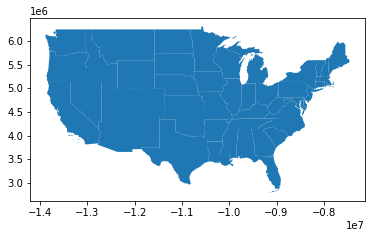

In [6]:
states.plot()

## Importing chipotle

In [7]:
chipotle = pd.read_csv("../Data/chipotle_stores.csv")
chipotle.head(10)

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
5,Alabama,Hoover,"1759 Montgomery Hwy Hoover, AL 35244 US",33.378958,-86.803802
6,Alabama,Huntsville,"5900 University Dr NW Ste D2 Huntsville, AL 35...",34.742319,-86.665720
7,Alabama,Mobile,"3871 Airport Blvd Mobile, AL 36608 US",30.675338,-88.143754
8,Alabama,Mobile,"7765 Airport Blvd D100 Mobile, AL 36608 US",30.682731,-88.224998
9,Alabama,Montgomery,"2560 Berryhill Rd Ste C Montgomery, AL 36117 US",32.359177,-86.162253


In [8]:
chipotle.isnull().sum()

state        0
location     0
address      0
latitude     0
longitude    0
dtype: int64

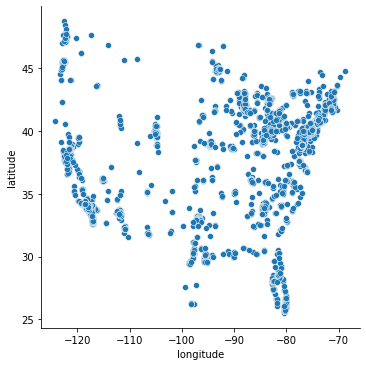

In [9]:
sns.relplot(data=chipotle, x="longitude", y="latitude")

In [8]:
chipotle.longitude.max()

-68.75374996916833

In [10]:
gdf = geopandas.GeoDataFrame(
    geometry=geopandas.points_from_xy(chipotle.longitude, chipotle.latitude))

In [10]:
gdf.head(10)

,geometry
0,POINT (-85.48733 32.60681)
1,POINT (-86.80276 33.50972)
2,POINT (-86.64744 33.59558)
3,POINT (-86.69828 33.42258)
4,POINT (-86.84122 34.15413)
5,POINT (-86.80380 33.37896)
6,POINT (-86.66572 34.74232)
7,POINT (-88.14375 30.67534)
8,POINT (-88.22500 30.68273)
9,POINT (-86.16225 32.35918)


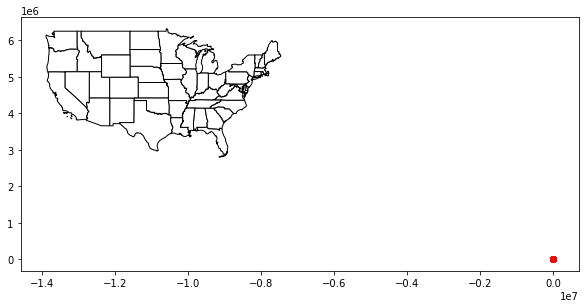

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

states.plot(ax = ax, edgecolor='black', color='white')

gdf.plot(ax=ax, color='red', alpha = 0.5)

plt.show()

#### Clustering

In [13]:
X=chipotle.loc[:,['latitude','longitude']]
X

,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220
...,...,...
2624,42.565892,-87.921048
2625,43.067723,-88.048222
2626,46.904247,-96.796618
2627,46.855337,-96.861416


In [47]:
n_cluster = len(chipotle["state"].unique())

In [59]:
id_n=15
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_

In [60]:
#Getting the clusters center
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[  31.23123962,  -96.60445124],
       [  40.5877831 ,  -82.70442445],
       [  34.07870689, -117.72603948],
       [  34.0683461 ,  -83.76679106],
       [  42.40810932,  -71.50591636],
       [  38.1956144 ,  -94.89216555],
       [  46.21251733, -121.91763502],
       [  44.71933806,  -93.36495211],
       [  40.77141815,  -74.41713607],
       [  27.53988235,  -81.23155543],
       [  33.26977465, -111.49206037],
       [  41.48983136,  -87.8793081 ],
       [  39.51493523, -105.85368309],
       [  38.31694529,  -77.36776425],
       [  37.86468298, -121.67434047]])

In [61]:
cluster_centroids = pd.DataFrame(cluster_centers, columns=["latitude_centroid","longitude_centroid"])
cluster_centroids

,latitude_centroid,longitude_centroid
0,31.231240,-96.604451
1,40.587783,-82.704424
2,34.078707,-117.726039
3,34.068346,-83.766791
4,42.408109,-71.505916
5,38.195614,-94.892166
6,46.212517,-121.917635
7,44.719338,-93.364952
8,40.771418,-74.417136
9,27.539882,-81.231555


In [62]:
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
chipotle_clusters = chipotle.join(cluster_labels.to_frame())
chipotle_clusters

,state,location,address,latitude,longitude,cluster
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,3
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,3
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,3
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,3
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,3
...,...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048,11
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222,11
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618,7
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416,7


In [63]:
colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

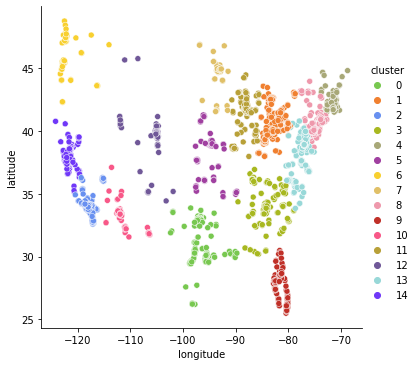

In [64]:
sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster", palette=colors)